In [10]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import ephem
from matplotlib import animation
import healpy as hp
hp.disable_warnings()

'''
Uses info from https://geohack.toolforge.org/geohack.php?pagename=Murchison_Radio-astronomy_Observatory&params=26.70312_S_116.670575_E_
as well as https://rhodesmill.org/pyephem/quick.html
'''

latitude = -31.9523
longitude = 115.8613
Observer = ephem.Observer()
Observer.lon = str(longitude)
Observer.lat = str(latitude)
Observer.elevation = 0
# Observer.date = datetime(2022, 4, 13, 22-8, 10) #Year, month, date, hrs, mins - UTC
Observer.date = datetime.utcnow()
ra_rad, dec_rad = Observer.radec_of(0, np.pi/2)
print ("LST =",ra_rad*12/np.pi, "hrs")

LST = 20.212106351446657 hrs


/tmp/ipykernel_4930/3064779751.py:11: RuntimeWarning: invalid value encountered in log2
  map_here = hp.orthview(np.log2(sky_val), half_sky=True, return_projected_map=True)


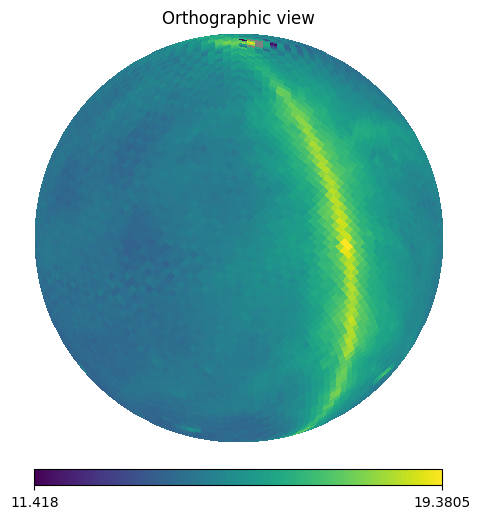

In [11]:
sky_map = hp.ud_grade(hp.read_map("/home/jishnu/SKY_MAPS/lambda_haslam408_nofilt.fits", dtype=np.float64), nside_out=32)
# hp.mollview(sky_map, cmap='viridis')

lst_hrs = ra_rad*12/np.pi
ra_deg  = lst_hrs*360/24.0

r_map = hp.Rotator(rot=[ra_deg, latitude], coord=['G', 'C'])    
sky_val = r_map.rotate_map_alms(sky_map, use_pixel_weights=False)
# hp.mollview(sky_val, cmap='viridis')

map_here = hp.orthview(np.log2(sky_val), half_sky=True, return_projected_map=True)


/tmp/ipykernel_4930/3334909364.py:10: UserWarning: Warning: converting a masked element to nan.
  Sky_pow[i] = np.ma.mean(hp.ma(map_here))


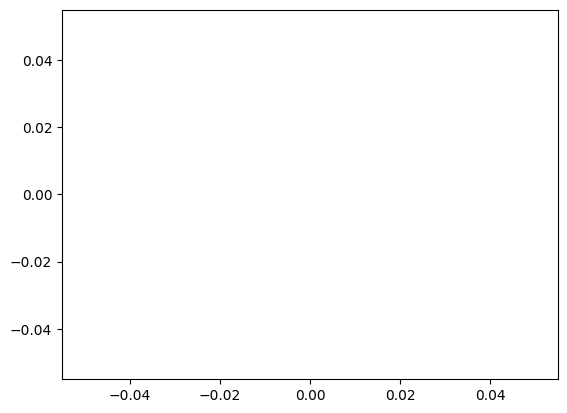

In [33]:
N_times = 24
Sky_pow = np.zeros(N_times)
i = 0
for lst_hrs in np.linspace(0, 24, 24):
    ra_deg  = lst_hrs*360/24.0

    r_map = hp.Rotator(rot=[ra_deg, latitude], coord=['G', 'C'])    
    sky_val = r_map.rotate_map_alms(sky_map, use_pixel_weights=False)
    map_here = hp.orthview(sky_val, half_sky=True, return_projected_map=True)
    Sky_pow[i] = np.ma.mean(hp.ma(map_here))
    plt.close()
    i = i+1

plt.figure()
plt.plot(np.linspace(0, 24, 24), Sky_pow)

In [40]:
# hp.ma(map_here)
hp.mask_bad(map_here)[400,400]

False

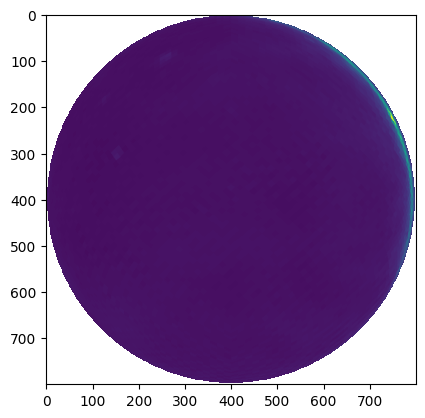

In [18]:
plt.figure()
plt.imshow(map_here)